In [7]:
import pandas as pd
import numpy as np
import os
import shutil
import glob

from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.resnet import preprocess_input, ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten , Dense
from tensorflow.python.keras.models import load_model
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report

In [8]:
NEW_DIR = "./database/"
ROOT_DIR = "./images/"

TRAIN_PATH  = "./database/train_test_split/train"
VALID_PATH  = "./database/train_test_split/validation"
TEST_PATH   = "./database/train_test_split/test"

objArrayDiseases = ["COVID", "Normal", "Pneumonia"]

In [9]:
objArrayCovid = pd.read_excel("./metadatas/covid.metadata.xlsx")
objArrayNormal = pd.read_excel("./metadatas/normal.metadata.xlsx")
objArrayPneumonia = pd.read_excel("./metadatas/pneumonia.metadata.xlsx")

In [10]:
for imgfile in glob.iglob(os.path.join(os.path.join(ROOT_DIR, "Pneumonia/"), "*.png")):
    os.rename(imgfile, imgfile.replace('Viral ', ''))

In [11]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in objArrayDiseases:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

Already Exist


In [12]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/COVID")
  os.makedirs(NEW_DIR+"train_test_split/train/Pneumonia")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/COVID")
  os.makedirs(NEW_DIR+"train_test_split/test/Pneumonia")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/COVID")
  os.makedirs(NEW_DIR+"train_test_split/validation/Pneumonia")


  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+objArrayDiseases[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/COVID" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+objArrayDiseases[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+objArrayDiseases[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Pneumonia" )
    os.remove(i)


  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+objArrayDiseases[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/COVID" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+objArrayDiseases[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+objArrayDiseases[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Pneumonia" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+objArrayDiseases[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/COVID" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+objArrayDiseases[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+objArrayDiseases[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Pneumonia" )
    os.remove(i)    

In [13]:
objTrainGenerator = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

objTrain = objTrainGenerator.flow_from_directory(directory= TRAIN_PATH, 
                                           target_size=(224,224))

Found 7800 images belonging to 3 classes.


In [14]:
objValidGenerator = ImageDataGenerator(preprocessing_function= preprocess_input  )

objValid = objValidGenerator.flow_from_directory(directory= VALID_PATH, 
                                                target_size=(224,224))

Found 1008 images belonging to 3 classes.


In [15]:
objTestGenerator = ImageDataGenerator(preprocessing_function= preprocess_input )

objTest = objTestGenerator.flow_from_directory(directory= TEST_PATH , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 800 images belonging to 3 classes.


In [16]:
classifier = ResNet50( input_shape=(224,224,3), include_top= False)

for layer in classifier.layers:       
  layer.trainable = False

94773248/94765736 [==============================] - 6s 0us/step


In [17]:
print (classifier.output)

objLayers = Flatten()(classifier.output)
objLayers = Dense(units=3 , activation='sigmoid', name = 'predictions' )(objLayers)

objModel = Model(classifier.input, objLayers)
objModel.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])
objModel.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormal

In [18]:
earlyStopping = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
modelCheckpoint = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [19]:
objFit = objModel.fit_generator(objTrain, steps_per_epoch= 10, epochs= 30, validation_data=objValid , validation_steps= 16, callbacks=[earlyStopping, modelCheckpoint])

c:\users\just maria\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 83s 8s/step - loss: 6.0523 - accuracy: 0.6531 - val_loss: 2.2965 - val_accuracy: 0.8164

Epoch 00001: val_accuracy improved from -inf to 0.81641, saving model to bestmodel.h5


c:\users\just maria\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
10/10 [==============================] - 73s 8s/step - loss: 4.1079 - accuracy: 0.7719 - val_loss: 2.2036 - val_accuracy: 0.8438

Epoch 00002: val_accuracy improved from 0.81641 to 0.84375, saving model to bestmodel.h5
Epoch 3/30
10/10 [==============================] - 72s 7s/step - loss: 2.9743 - accuracy: 0.8173 - val_loss: 1.6586 - val_accuracy: 0.8770

Epoch 00003: val_accuracy improved from 0.84375 to 0.87695, saving model to bestmodel.h5
Epoch 4/30
10/10 [==============================] - 71s 7s/step - loss: 2.4359 - accuracy: 0.8656 - val_loss: 1.8612 - val_accuracy: 0.9023

Epoch 00004: val_accuracy improved from 0.87695 to 0.90234, saving model to bestmodel.h5
Epoch 5/30
10/10 [==============================] - 71s 7s/step - loss: 2.7093 - accuracy: 0.8656 - val_loss: 3.6823 - val_accuracy: 0.8242

Epoch 00005: val_accuracy did not improve from 0.90234
Epoch 6/30
10/10 [==============================] - 69s 7s/step - loss: 2.2241 - accuracy: 0.8719 - val_loss: 1.72

In [20]:
objModel = load_model("bestmodel.h5")

nr_Acurracy = objModel.evaluate_generator(generator=objTest)[1] 

print(f"A acurácia do modelo selecionado foi de = {nr_Acurracy}%")

c:\users\just maria\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1996: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


A acurácia do modelo selecionado foi de = 0.8799999952316284%


In [21]:
true_classes = objTest.classes
class_labels = list(objTest.class_indices.keys())   

predictions = objModel.predict_generator(objTest)
predictions = np.argmax(predictions, axis=1)

report = classification_report(true_classes, predictions, target_names=class_labels)
print(report)    

c:\users\just maria\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:2024: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

       COVID       0.91      0.82      0.86       300
      Normal       0.78      0.93      0.85       300
   Pneumonia       0.97      0.83      0.90       200

    accuracy                           0.86       800
   macro avg       0.89      0.86      0.87       800
weighted avg       0.88      0.86      0.87       800



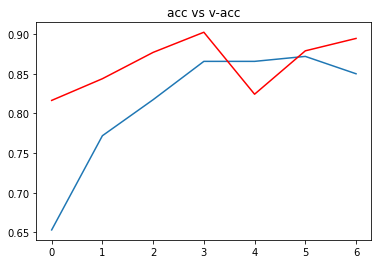

In [22]:
objHistory = objFit.history

plt.plot(objHistory['accuracy'])
plt.plot(objHistory['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

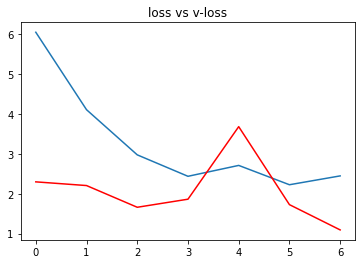

In [23]:
objHistory = objFit.history

plt.plot(objHistory['loss'])
plt.plot(objHistory['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

A imagem é da seguinte class: Normal

As chances da imagem ser da classe COVID é: 0.752788782119751 porcento

As chances da imagem ser da classe Normal é: 100.0 porcento

As chances da imagem ser da classe Pneumonia é: 3.3249614866948107e-09 porcento


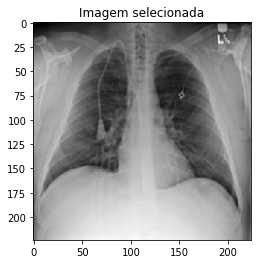

In [24]:
def Get_Image(ds_Image_Path):
  path = ds_Image_Path
  objImage = image.load_img(path, target_size=(224,224,3))
  objImage = image.img_to_array(objImage)
  objImage = np.expand_dims(objImage , axis= 0 )
  
  return objImage


ds_Image_Path = "./database/Normal-5.png"   
objImage = Get_Image(ds_Image_Path)

objClassType = {0:'Covid',  1 : 'Normal', 2: 'Pneumonia'}

res = objClassType[np.argmax(objModel.predict(objImage))]

print(f"A imagem é da seguinte class: {res}")
print()
print(f"As chances da imagem ser da classe COVID é: {objModel.predict(objImage)[0][0]*100} porcento")
print()
print(f"As chances da imagem ser da classe Normal é: {objModel.predict(objImage)[0][1]*100} porcento")
print()
print(f"As chances da imagem ser da classe Pneumonia é: {objModel.predict(objImage)[0][2]*100} porcento")

plt.imshow(objImage[0]/255, cmap = "gray")
plt.title("Imagem selecionada")
plt.show()